# Cross Section Data

Experimentally the Rosenbluth technique is a straight forward way to extract the electric and magnetic form factors of the nucleon though limits the amount of data that can be used.

For data below 1 GeV/c^2, the world data is dominated by the Mainz data, though it is worth
noting that due to floating normalizations, different groups extract slightly different values for the form factors from the same cross section data.


## Formulas 

Now using the asymmetry result, it is possible to turn the cross section points in form factors (i.e. two equations and two unknowns).

Asymmetry = $\mu G_E / G_M$

Reduced Cross Section = $\frac{1}{\epsilon(1+\tau)}(\epsilon G_E^2 + \tau G_M^2)$
where $\tau = \frac{Q^2}{4 m_p}$.


In [1]:
from math import sqrt
import numpy as np

# So we take the rebinned data of Arrington, Hill and Lee but reformat it to four columns:
# tau, epsilon, cross section, uncertainty.

# This is 658 Cross Section Points


PROTON_MASS = 0.938272 
PROTON_MU   = 2.792847 

q2=[]; eps=[]; rcs=[]; ecs=[]

def tau(q2):
    return q2/4/PROTON_MASS**2

def charge(q2,eps,rcs,delta):
    GE2=(rcs*eps*(1+tau(q2)))/(eps+tau(q2)*(PROTON_MU/asymmetry(q2,delta))**2)
    return GE2

def magnetic(q2,eps,rcs,delta):
    GM2=(rcs*eps*(1+tau(q2)))/ (eps*(asymmetry(q2,delta)/PROTON_MU)**2+tau(q2))
    return GM2
    
def asymmetry(q2,delta):
    return (1-q2/(8.02*delta)) 

def carlfunc(q2,delta):
    return (1-q2/(8.02*delta)) 

for l in open("test.dat"):
    values=l.split()
    q2.append(float(values[0])/25.7)
    eps.append(float(values[1]))
    rcs.append(float(values[2]))   
    ecs.append(float(values[3]))  

count=0

#print('Event  Q2  GE2')

ge=[]; gm=[]; dge=[]; uge=[]; ugm=[]

for n in range(len(q2)):
    count+=1
    #print("{0:3} {1:0.3f} {2:0.3f} {3:0.3f} ".format \
    #      (count, q2[n], charge(q2[n],eps[n],rcs[n]), charge(q2[n],eps[n],rcs[n]*1.01) ))
    try:
        ge.append(sqrt(charge(q2[n],eps[n],rcs[n],1.0)))
        t=(sqrt(charge(q2[n],eps[n],rcs[n],1.0)))
        uge.append((sqrt(charge(q2[n],eps[n],rcs[n]*(1+ecs[n]),1.05))-t))
        gm.append(sqrt(magnetic(q2[n],eps[n],rcs[n],1)))
        y=sqrt(magnetic(q2[n],eps[n],rcs[n],1))
        x=sqrt(magnetic(q2[n],eps[n],rcs[n]*(1+ecs[n]),0.95))
        ugm.append(x-y)
    except:
        print('Problem with event',n+1)
        ge.append(0)
        uge.append(0)
        dge.append(0)
        
emax=[0,0]; emin=[10,0]
mmax=[0,0]; mmin=[10,0]

for n in range(len(ge)):
    if (uge[n]/ge[n] > emax[0]):
        emax=[uge[n]/ge[n],q2[n]]
    if (uge[n]/ge[n] < emin[0]):
        emin=[uge[n]/ge[n],q2[n]]
    if (ugm[n]/gm[n] > mmax[0]):
        mmax=[ugm[n]/gm[n],q2[n]]
    if (ugm[n]/gm[n] < mmin[0]):
        mmin=[ugm[n]/gm[n],q2[n]]
print('')
print('Check the max. and min. calculated weights.')
print('')
print('max ge weight = {0:0.4f} at Q2 = {1:0.4f}'.format(emax[0],emax[1]))
print('min ge weight = {0:0.4f} at Q2 = {1:0.4f}'.format(emin[0],emin[1]))
print('')
print('max gm weight = {0:0.4f} at Q2 = {1:0.4f}'.format(mmax[0],mmax[1]))
print('min gm weight = {0:0.4f} at Q2 = {1:0.4f}'.format(mmin[0],mmin[1]))
print('')

#for n in range(len(q2)):
#    print('{0:0.4f}, {1:0.4f}, {2:0.4f}, {3:0.4f}'.format(q2[n],eps[n],rcs[n],ecs[n]))


Check the max. and min. calculated weights.

max ge weight = 0.0092 at Q2 = 0.9772
min ge weight = 0.0012 at Q2 = 0.1564

max gm weight = 0.0041 at Q2 = 0.0756
min gm weight = 0.0013 at Q2 = 0.8586



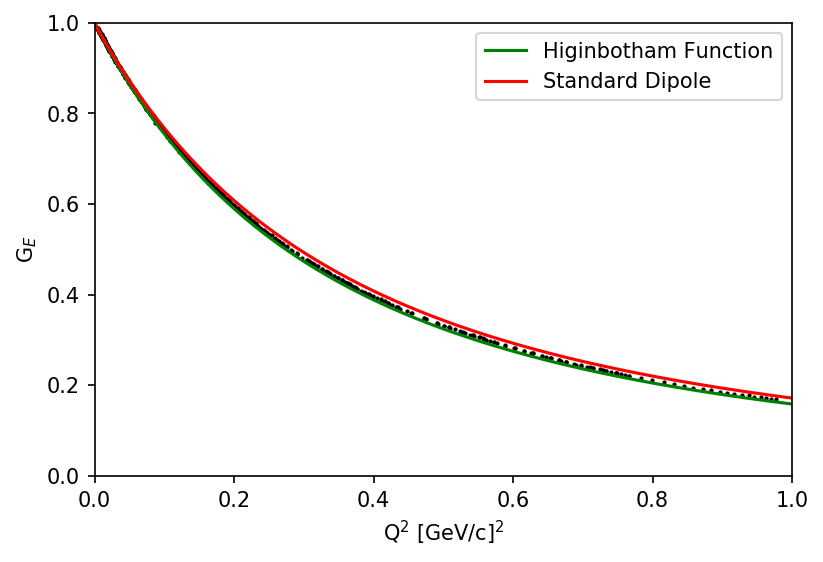

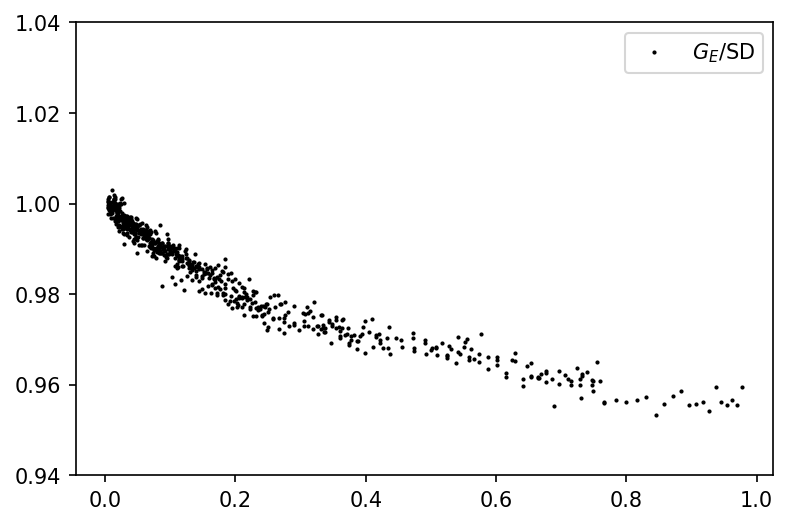

In [2]:
import matplotlib.pyplot as plt

def sd(q2):
    return (1+25.7*0.11/2*q2)**(-2)

def dd(q2):
    return (1+25.7*0.1176/2*q2)**(-2)
    #return (1-0.6*q2)/(1+2.4*q2)

rdd=[]; sdd=[]; mdd=[]

mq2=np.linspace(0,1,1000)
for n in mq2:
    rdd.append(dd(n))
    sdd.append(sd(n))
    mdd.append(sd(n)*PROTON_MU)

plt.figure(dpi=150)
plt.plot(q2,ge,'o',ms=1,color='black')
plt.errorbar(q2,ge,yerr=uge,fmt=',',zorder=1,color='black')
plt.plot(mq2,rdd,'r',color='green',label='Higinbotham Function')
plt.plot(mq2,sdd,'-',color='red',label='Standard Dipole')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('G$_E$')
plt.legend()
plt.savefig("./Figures/GeFigure.png") # Raster Graphic
plt.savefig("./Figures/GeFigure.pdf") # Vector Graphic
plt.show()

ratio=[]
count=0
for m in q2:
    ratio.append(ge[count]/sd(m))
    count+=1

plt.figure(dpi=150)
plt.plot(q2,ratio,'o',ms=1,label='$G_E$/SD',color='black')
plt.ylim(0.94,1.04)
plt.legend()
plt.show()

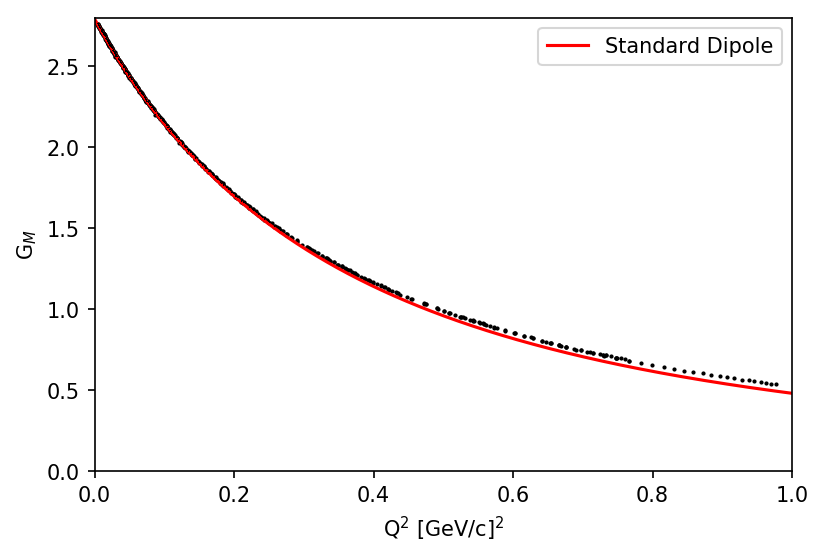

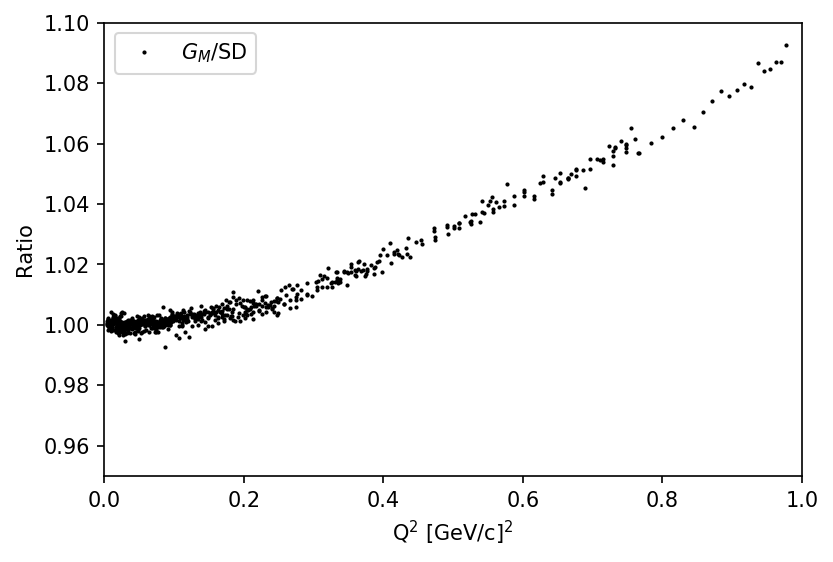

In [3]:
#
# Gm vs. Q2 Plot
#
plt.figure(dpi=150)
plt.plot(q2,gm,'o',ms=1,color='black')
plt.errorbar(q2,gm,yerr=ugm,fmt=',',color='black')
plt.plot(mq2,mdd,'-',color='red',label='Standard Dipole')
plt.xlim(0,1)
plt.ylim(0,PROTON_MU)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('G$_M$')
plt.legend()
plt.xlim(0,1)
plt.ylim(0,2.8)
plt.savefig("./Figures/GmFigure.png") # Raster Graphic
plt.savefig("./Figures/GmFigure.pdf") # Vector Graphic
plt.show()

ratio=[];rq2=[]
count=0

for m in q2:
    ratio.append(gm[count]/(sd(m)*PROTON_MU))
    rq2.append(m)
    count+=1
    
plt.figure(dpi=150)
plt.plot(rq2,ratio,'o',ms=1,label='$G_M$/SD',color='black')
plt.ylim(0.95,1.1)
plt.xlim(0,1)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('Ratio')
plt.legend()
plt.show()

[[Model]]
    Model(gefunc)
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 658
    # variables        = 2
    chi-square         = 708.749
    reduced chi-square = 1.080
    Akaike info crit   = 52.887
    Bayesian info crit = 61.865
[[Variables]]
    a:   1.71486159 +/- 0.016312 (0.95%) (init= 1.5)
    b:   1.24416216 +/- 0.014915 (1.20%) (init= 1.5)
[[Correlations]] (unreported correlations are <  0.100)
    C(a, b)                      = -0.999 



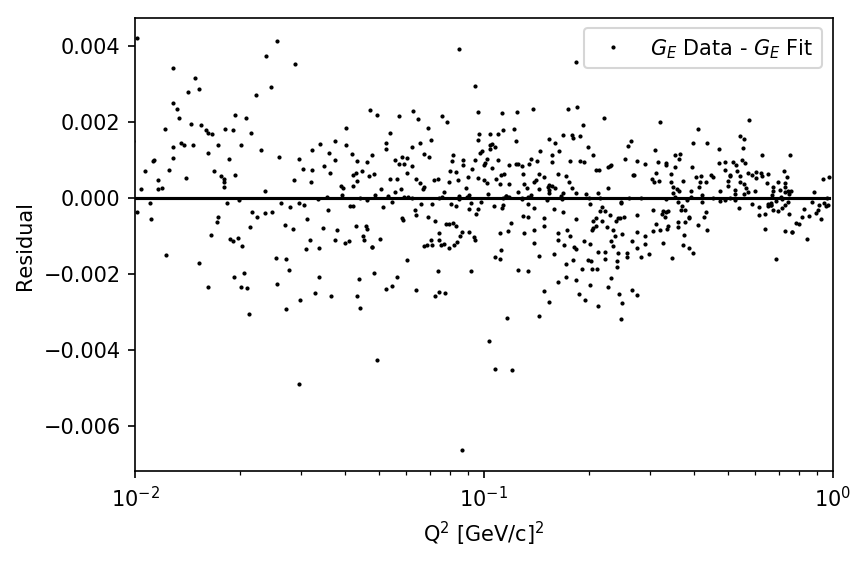

In [4]:
from lmfit import Model

def gefunc(q2,a,b):
    return ((1+a*q2)*(1+b*q2))**(-1)

weight=[]

for n in range(len(uge)):
    weight.append(1/uge[n])

model=Model(gefunc)
result=model.fit(ge,q2=q2,a=1.5,b=1.5,weights=weight)

print(result.fit_report())
a=(result.values['a'])
b=(result.values['b'])

def resultfunc(q2):
    return ((1+a*q2)*(1+b*q2))**(-1)

residual=[]
count=0
for m in q2:
    residual.append(ge[count]-resultfunc(m))
    count+=1

plt.figure(dpi=150)
plt.plot(q2,residual,'o',ms=1,label='$G_E$ Data - $G_E$ Fit',color='black')
plt.plot(q2,[0]*len(q2),'-',color='black')
#plt.ylim(-0.005,0.005)
plt.xscale('log')
plt.xlim(0.01,1)
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('Residual')
plt.legend()
plt.savefig("./Figures/GeResidual.png") # Raster Graphic
plt.savefig("./Figures/GeResidual.pdf") # Vector Graphic
plt.show()

[[Model]]
    Model(gmfunc)
[[Fit Statistics]]
    # function evals   = 59
    # data points      = 658
    # variables        = 3
    chi-square         = 762.073
    reduced chi-square = 1.163
    Akaike info crit   = 102.619
    Bayesian info crit = 116.086
[[Variables]]
    aa:   1.83024274 +/- 0.027994 (1.53%) (init= 2.5)
    bb:   1.11990292 +/- 0.030106 (2.69%) (init= 0.5)
    cc:  -0.10926120 +/- 0.004309 (3.94%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(aa, bb)                    = -0.998 
    C(bb, cc)                    = -0.980 
    C(aa, cc)                    =  0.965 



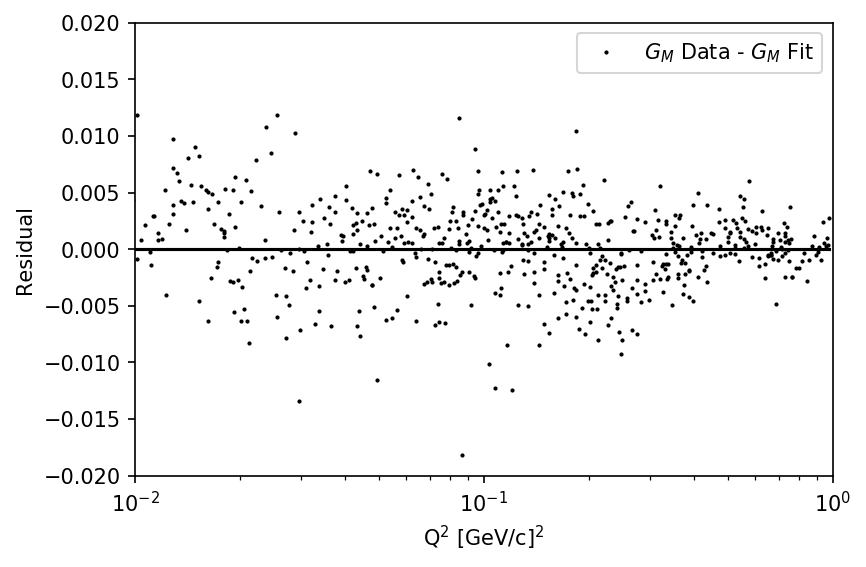

In [5]:
from lmfit import Model

def gmfunc(q2,aa,bb,cc):
    return PROTON_MU/((1+(aa)*q2)*(1+(bb)*q2)*(1+(cc)*q2))
    #return PROTON_MU/((1+aa*q2)*(1+bb*q2))

weight=[]

for n in range(len(ugm)):
    weight.append(1/ugm[n])

model=Model(gmfunc)
result=model.fit(gm,q2=q2,aa=2.5,bb=0.5,cc=0.0,weights=weight)

print(result.fit_report())
aa=(result.values['aa'])
bb=(result.values['bb'])
cc=(result.values['cc'])

def resultfunc(q2):
    return PROTON_MU/((1+(aa)*q2)*(1+(bb)*q2)*(1+(cc)*q2))
    #return PROTON_MU/((1+aa*q2)*(1+bb*q2))

residual=[]
count=0
for m in q2:
    residual.append(gm[count]-resultfunc(m))
    count+=1

plt.figure(dpi=150)
plt.plot(q2,residual,'o',ms=1,label='$G_M$ Data - $G_M$ Fit',color='black')
plt.plot(q2,[0]*len(q2),'-',color='black')
plt.ylim(-0.02,0.02)
plt.xlim(0.01,1)
plt.xscale('log')
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('Residual')
plt.legend()
plt.savefig("./Figures/GmResidual.png") # Raster Graphic
plt.savefig("./Figures/GmResidual.pdf") # Vector Graphic
plt.show()

q2,     ge,     ge-err, gm,     gm-err, mu ge/gm, error
0.0038, 0.9895, 0.0019, 2.7648, 0.0054, 0.9995, 0.0108
0.0040, 0.9880, 0.0017, 2.7608, 0.0048, 0.9995, 0.0097
0.0042, 0.9878, 0.0023, 2.7602, 0.0066, 0.9995, 0.0132
0.0044, 0.9882, 0.0019, 2.7614, 0.0055, 0.9994, 0.0110
0.0046, 0.9861, 0.0017, 2.7556, 0.0049, 0.9994, 0.0098
0.0048, 0.9843, 0.0018, 2.7506, 0.0053, 0.9994, 0.0106
0.0050, 0.9870, 0.0017, 2.7582, 0.0047, 0.9994, 0.0095
0.0053, 0.9866, 0.0016, 2.7572, 0.0047, 0.9993, 0.0094
0.0055, 0.9844, 0.0018, 2.7513, 0.0052, 0.9993, 0.0104
0.0057, 0.9842, 0.0016, 2.7507, 0.0047, 0.9993, 0.0094
0.0059, 0.9848, 0.0016, 2.7525, 0.0047, 0.9993, 0.0094
0.0062, 0.9815, 0.0016, 2.7434, 0.0046, 0.9992, 0.0093
0.0064, 0.9808, 0.0016, 2.7414, 0.0046, 0.9992, 0.0092
0.0066, 0.9818, 0.0015, 2.7443, 0.0044, 0.9992, 0.0089
0.0069, 0.9786, 0.0017, 2.7353, 0.0049, 0.9991, 0.0099
0.0071, 0.9792, 0.0017, 2.7371, 0.0050, 0.9991, 0.0101
0.0074, 0.9792, 0.0016, 2.7374, 0.0046, 0.9991, 0.0093
0.0077, 0

0.2578, 0.5234, 0.0011, 1.5104, 0.0027, 0.9679, 0.0110
0.2592, 0.5249, 0.0009, 1.5148, 0.0030, 0.9677, 0.0102
0.2608, 0.5217, 0.0009, 1.5060, 0.0027, 0.9675, 0.0099
0.2647, 0.5189, 0.0009, 1.4986, 0.0030, 0.9670, 0.0105
0.2663, 0.5145, 0.0012, 1.4864, 0.0027, 0.9668, 0.0115
0.2663, 0.5132, 0.0011, 1.4825, 0.0026, 0.9668, 0.0111
0.2686, 0.5138, 0.0008, 1.4846, 0.0026, 0.9665, 0.0095
0.2702, 0.5120, 0.0009, 1.4798, 0.0030, 0.9663, 0.0104
0.2744, 0.5056, 0.0012, 1.4621, 0.0027, 0.9658, 0.0118
0.2744, 0.5060, 0.0012, 1.4633, 0.0026, 0.9658, 0.0115
0.2745, 0.5043, 0.0012, 1.4584, 0.0026, 0.9658, 0.0115
0.2758, 0.5064, 0.0009, 1.4648, 0.0029, 0.9656, 0.0105
0.2759, 0.5049, 0.0009, 1.4604, 0.0026, 0.9656, 0.0102
0.2814, 0.4995, 0.0009, 1.4459, 0.0029, 0.9649, 0.0106
0.2825, 0.4969, 0.0013, 1.4385, 0.0027, 0.9648, 0.0123
0.2900, 0.4916, 0.0008, 1.4245, 0.0025, 0.9638, 0.0097
0.2901, 0.4897, 0.0012, 1.4189, 0.0026, 0.9638, 0.0122
0.2905, 0.4891, 0.0009, 1.4172, 0.0025, 0.9638, 0.0104
0.2977, 0.

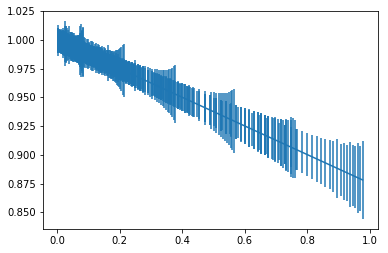

In [6]:
print('q2,     ge,     ge-err, gm,     gm-err, mu ge/gm, error')
for n in range(len(q2)):
    print('{0:0.4f}, {1:0.4f}, {2:0.4f}, {3:0.4f}, {4:0.4f}, {5:0.4f}, {6:0.4f}'.\
          format(q2[n],ge[n],uge[n],gm[n],ugm[n],PROTON_MU*ge[n]/gm[n],\
                 PROTON_MU*(uge[n]/ge[n]+ugm[n]/gm[n])))

q2=np.array(q2)
ge=np.array(ge)
gm=np.array(gm)
uge=np.array(uge)
ugm=np.array(ugm)

plt.errorbar(q2,PROTON_MU*ge/gm,PROTON_MU*(uge/ge+ugm/gm))
plt.show()

In [7]:
f=open("formfactors.dat","w")
f.write('q2,     ge,     ge-err, gm,     gm-err \n')
for n in range(len(q2)):
    f.write('{0:0.4f}, {1:0.4f}, {2:0.4f}, {3:0.4f}, {4:0.4f} \n'.\
          format(q2[n],ge[n],uge[n],gm[n],ugm[n]))
f.close()

With the G<sub>E</sub> and G<sub>M</sub> fits, we can make a new ratio function and complare
with the originial.

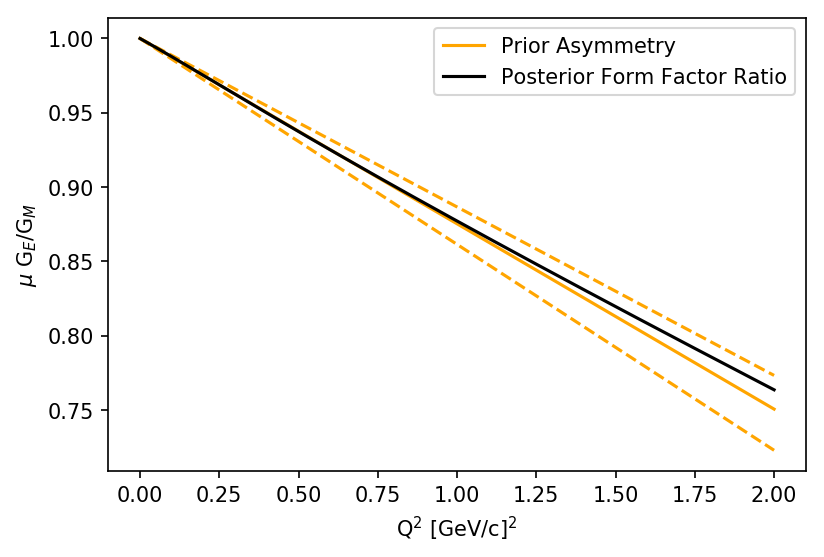

In [8]:
def newasym(q2):
#    return ((1+aa*q2)*(1+bb*q2))/((1+a*q2)*(1+b*q2))
    return ((1+aa*q2)*(1+bb*q2)*(1+cc*q2))/((1+a*q2)*(1+b*q2))

newa=[]; olda=[]; oldu=[]; oldd=[]

myq2=np.linspace(0,2,1000)

for n in range(len(myq2)):
    newa.append(newasym(myq2[n]))
    olda.append(carlfunc(myq2[n],1))
    oldu.append(carlfunc(myq2[n],1.1))
    oldd.append(carlfunc(myq2[n],0.9))

plt.figure(dpi=150)
plt.plot(myq2,olda, color='orange', label='Prior Asymmetry')
plt.plot(myq2,oldu, '--', color='orange')# label='Prior Asymmetry')
plt.plot(myq2,oldd, '--', color='orange')# label='Prior Asymmetry')
plt.plot(myq2,newa, color='black', label='Posterior Form Factor Ratio')
plt.legend()
plt.xlabel('Q$^2$ [GeV/c]$^2$')
plt.ylabel('$\mu$ G$_E$/G$_M$')
plt.show()

In [9]:
print('Resulting Form Factor Ratio Fuction')
print('')
print('def newasym(q2):')
print('     return (( 1 +{0:0.4f}*q2)*(1+{1:0.4f}*q2)*(1+{2:0.4f}))/((1+{3:0.4f}*q2)*(1+{4:0.4f}*q2))'.\
      format(aa,bb,cc,a,b))

Resulting Form Factor Ratio Fuction

def newasym(q2):
     return (( 1 +1.8302*q2)*(1+1.1199*q2)*(1+-0.1093))/((1+1.7149*q2)*(1+1.2442*q2))


## References

* https://doi.org/10.1103/PhysRevD.92.013013
* https://doi.org/10.1103/PhysRevC.93.055201